<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S9-V2/S9-V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount your G-Drive**

In [1]:
from __future__ import print_function
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


**Add Library Path in your def search path**

In [2]:
import sys
sys.path.append('/content/drive/My Drive/EVA4/evaLibraryS9')
!ls '/content/drive/My Drive/EVA4/evaLibraryS9'

alb2.py		       DataLoaders.py  Gradcam.py   rohan_library.py
AlbTestTransforms.py   displayData.py  __pycache__
AlbTrainTransforms.py  execute.py      resNet.py


**Import required libraries**

In [3]:
from rohan_library import *
import execute
from resNet import ResNet18
import displayData as display
import Gradcam 
# from Gradcam import GRADCAM, PLOT
import albumentations as alb
import DataLoaders as loader
# import AlbTrainTransforms
import AlbTestTransforms

REQUIRED LIBRARIES LOADED...


**Albumentations**

In [0]:
from albumentations import Compose, RandomCrop, Normalize, Resize, Rotate, Cutout, PadIfNeeded, RandomCrop, Flip
from albumentations.pytorch import ToTensor
import numpy as np


class train_transforms():
    
    def __init__(self):
        self.albTrainTransforms = Compose([ 
            PadIfNeeded(min_height = 36, min_width = 36, border_mode = 0, p = 1.0),
            RandomCrop(height = 32, width = 32, p = 1.0),
            Rotate((-15.0,15.0), p=0.7),
            Cutout(num_holes = 2, max_h_size = 8, max_w_size = 8, p = 1.0),
            Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
            ToTensor()
        ])

    def __call__(self, img):
        img = np.array(img)
        img = self.albTrainTransforms(image=img)['image']
        return img

albTrain = train_transforms()
albTest = AlbTestTransforms.test_transforms()

**Load the Datasets**

In [5]:
train = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = albTrain)
test = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = albTest)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


**DataLoader for Train & Test Dataset**

In [0]:
dl = loader.DataLoaders()
trainLoader = dl.dataLoader(train)
testLoader = dl.dataLoader(test)


In [7]:
dataiter = iter(trainLoader)

images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([128, 3, 32, 32])
torch.Size([128])


**Displaying Random Images**

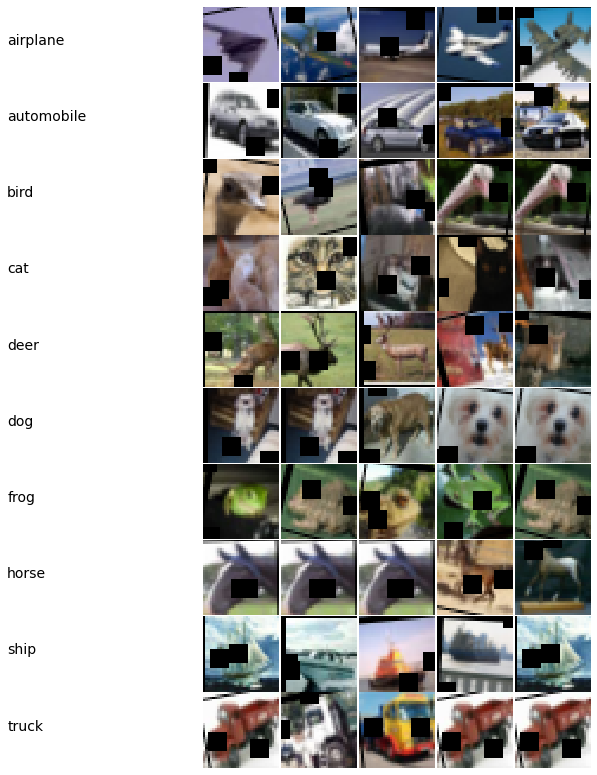

In [8]:
display.classImages(trainLoader)

**Model Summary**

In [10]:
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
print('Device set to ', device)


Device set to  cuda


In [11]:

      
model = ResNet18(GBN=True).to(device)
summary(model, input_size=(3,32,32))

<class 'int'>
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
    GhostBatchNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
    GhostBatchNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
    GhostBatchNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
    GhostBatchNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
   GhostBatchNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
   GhostBatchNorm-14     

**Modelling**

In [12]:
incorrectSamples = []
correctSamples = []
correctLabels = []
model = ResNet18().to(device)


criterion = execute.cross_entropy_loss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainLoader), epochs = 25)


model1 = execute.Test_Train()
EPOCHS = 25


for epoch in range(1, EPOCHS+1):

  print('EPOCH: ',epoch)
  model1.train(model, device, trainLoader, optimizer, epoch, scheduler, criterion, L1lambda = 1e-5 )

  model1.test(model, device, testLoader, 'model1.pt', criterion, correctSamples, correctLabels, incorrectSamples)

  0%|          | 0/391 [00:00<?, ?it/s]

<class 'int'>
EPOCH:  1


Loss=2.4953107833862305 Batch_id=390 Accuracy=43.78: 100%|██████████| 391/391 [00:59<00:00,  6.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 1.3768).  Saving model ...

Test set: Average loss: 1.3768, Accuracy: 5482/10000 (54.82%)

EPOCH:  2


Loss=2.0399703979492188 Batch_id=390 Accuracy=60.52: 100%|██████████| 391/391 [01:01<00:00,  6.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.3768 --> 0.6543).  Saving model ...

Test set: Average loss: 0.6543, Accuracy: 6550/10000 (65.50%)

EPOCH:  3


Loss=1.9441440105438232 Batch_id=390 Accuracy=68.99: 100%|██████████| 391/391 [01:02<00:00,  6.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.6543 --> 0.2905).  Saving model ...

Test set: Average loss: 0.2905, Accuracy: 7276/10000 (72.76%)

EPOCH:  4


Loss=1.7353532314300537 Batch_id=390 Accuracy=73.89: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9992, Accuracy: 7270/10000 (72.70%)

EPOCH:  5


Loss=1.7150890827178955 Batch_id=390 Accuracy=76.89: 100%|██████████| 391/391 [01:03<00:00,  6.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6680, Accuracy: 7982/10000 (79.82%)

EPOCH:  6


Loss=1.5036327838897705 Batch_id=390 Accuracy=79.35: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8386, Accuracy: 8050/10000 (80.50%)

EPOCH:  7


Loss=1.362023115158081 Batch_id=390 Accuracy=81.10: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9573, Accuracy: 7756/10000 (77.56%)

EPOCH:  8


Loss=1.2724535465240479 Batch_id=390 Accuracy=82.94: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.2905 --> 0.1269).  Saving model ...

Test set: Average loss: 0.1269, Accuracy: 8364/10000 (83.64%)

EPOCH:  9


Loss=1.5564146041870117 Batch_id=390 Accuracy=84.02: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4261, Accuracy: 8319/10000 (83.19%)

EPOCH:  10


Loss=1.3129279613494873 Batch_id=390 Accuracy=84.84: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2375, Accuracy: 8486/10000 (84.86%)

EPOCH:  11


Loss=1.149425983428955 Batch_id=390 Accuracy=85.98: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6789, Accuracy: 8293/10000 (82.93%)

EPOCH:  12


Loss=1.2579643726348877 Batch_id=390 Accuracy=86.90: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2059, Accuracy: 8578/10000 (85.78%)

EPOCH:  13


Loss=1.176985740661621 Batch_id=390 Accuracy=87.71: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2768, Accuracy: 8456/10000 (84.56%)

EPOCH:  14


Loss=1.150160312652588 Batch_id=390 Accuracy=88.02: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7551, Accuracy: 8626/10000 (86.26%)

EPOCH:  15


Loss=1.003647804260254 Batch_id=390 Accuracy=88.91: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2794, Accuracy: 8658/10000 (86.58%)

EPOCH:  16


Loss=1.0378162860870361 Batch_id=390 Accuracy=89.53: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4200, Accuracy: 8513/10000 (85.13%)

EPOCH:  17


Loss=0.9785521030426025 Batch_id=390 Accuracy=90.07: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2020, Accuracy: 8627/10000 (86.27%)

EPOCH:  18


Loss=0.9222310185432434 Batch_id=390 Accuracy=90.11: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5062, Accuracy: 8659/10000 (86.59%)

EPOCH:  19


Loss=1.0259383916854858 Batch_id=390 Accuracy=90.78: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5476, Accuracy: 8578/10000 (85.78%)

EPOCH:  20


Loss=1.0496634244918823 Batch_id=390 Accuracy=90.73: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1536, Accuracy: 8739/10000 (87.39%)

EPOCH:  21


Loss=1.022249698638916 Batch_id=390 Accuracy=91.21: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2047, Accuracy: 8686/10000 (86.86%)

EPOCH:  22


Loss=0.7827574014663696 Batch_id=390 Accuracy=91.71: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3194, Accuracy: 8591/10000 (85.91%)

EPOCH:  23


Loss=0.8126018643379211 Batch_id=390 Accuracy=91.84: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3192, Accuracy: 8710/10000 (87.10%)

EPOCH:  24


Loss=0.7195271849632263 Batch_id=390 Accuracy=92.46: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4206, Accuracy: 8725/10000 (87.25%)

EPOCH:  25


Loss=0.9788906574249268 Batch_id=390 Accuracy=92.46: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]



Test set: Average loss: 0.5108, Accuracy: 8812/10000 (88.12%)



**Plot Train & Test Curves**

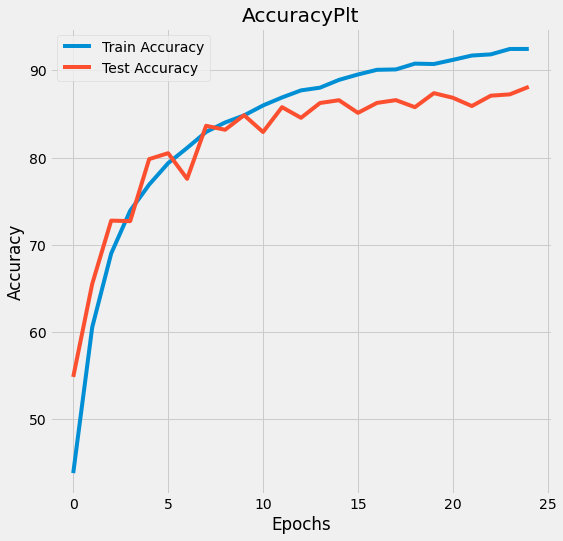

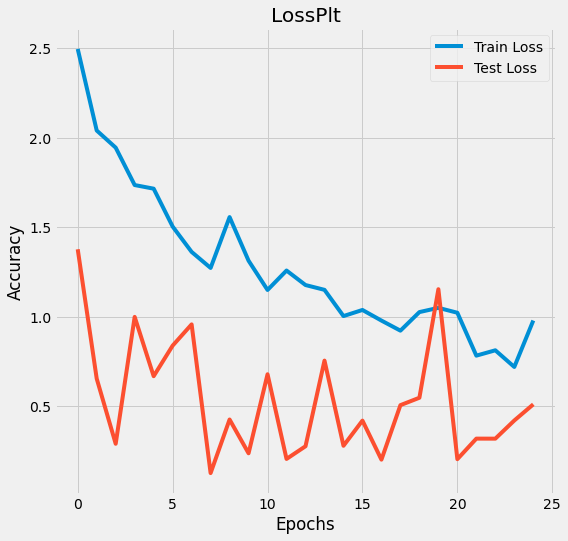

In [13]:
acc_elems = [(model1.train_acc, 'Train Accuracy'), (model1.test_acc, 'Test Accuracy')]
loss_elems = [(model1.train_losses, 'Train Loss'), (model1.test_losses, 'Test Loss')]
display.plot_curve(acc_elems, 'AccuracyPlt')
display.plot_curve(loss_elems,'LossPlt')

**Data for GradCam**

In [24]:

images = [x['image'] for x in incorrectSamples[10:20]]
target_classes = [l['label'] for l in incorrectSamples[10:20]]
# print(images)
for i in target_classes:
  print(classes[i])


horse
plane
dog
plane
dog
horse
deer
frog
cat
cat


**GradCam Implementation**

**Changes to be done**
1.Make it simple and try changing letter cases
2.Update the code and restart the kernel


<class 'int'>
torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


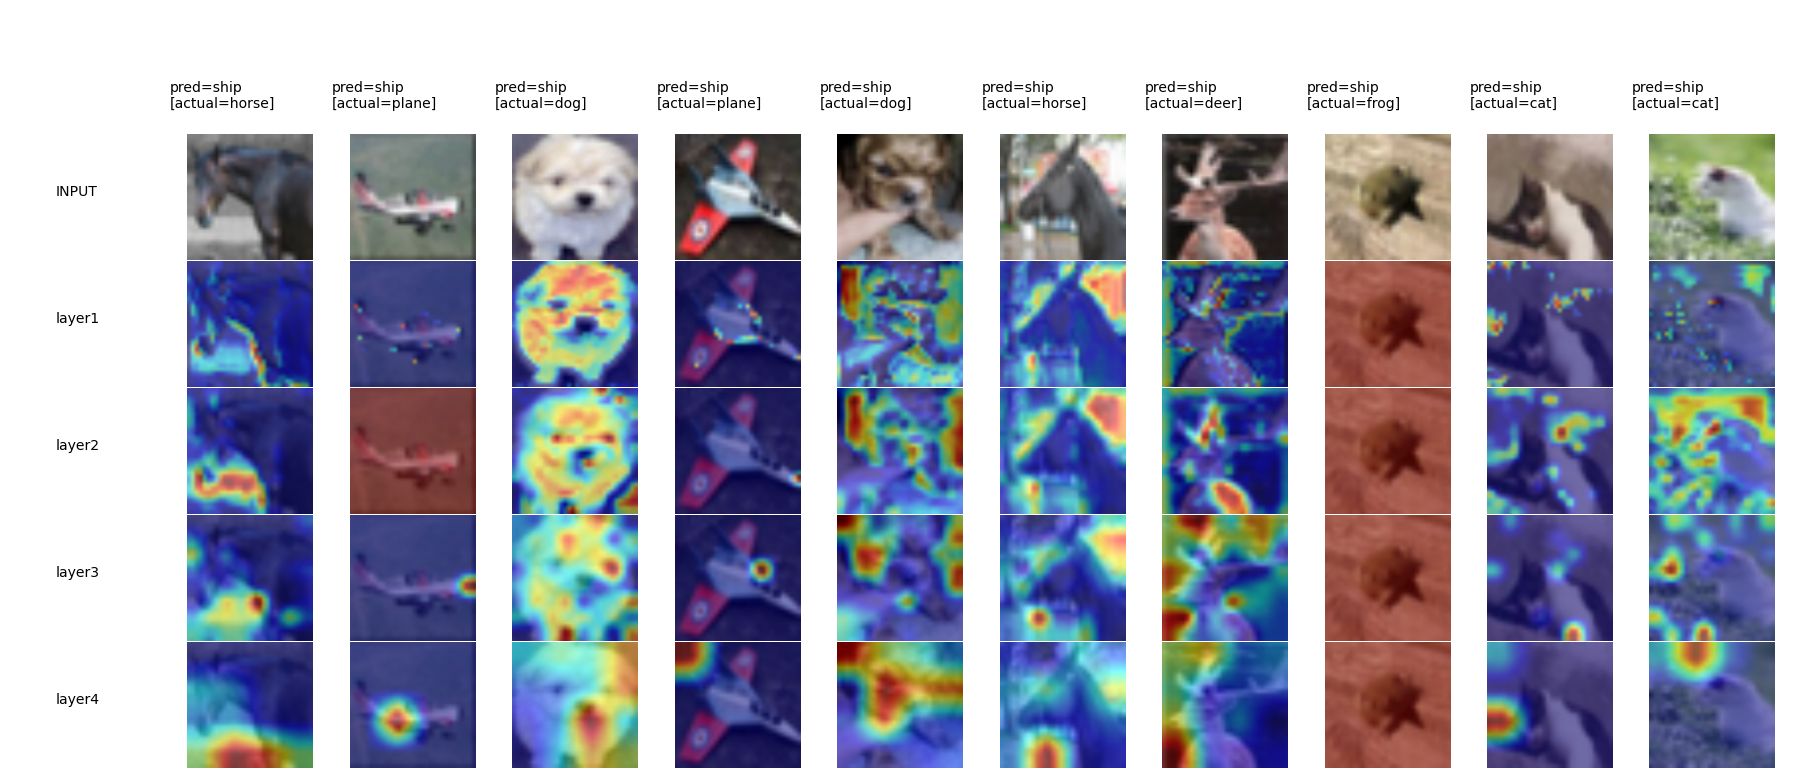

In [25]:
model = ResNet18().to(device)
image_size = (3,32,32)


target_layers = ["layer1", "layer2", "layer3", "layer4"]
gradcam_output, probs, predicted_classes = Gradcam.GRADCAM(images, device, target_classes, model, target_layers)
Gradcam.PLOT(gradcam_output, images, target_classes, target_layers, classes, image_size, predicted_classes, display.unnormalize)


<Figure size 936x936 with 0 Axes>

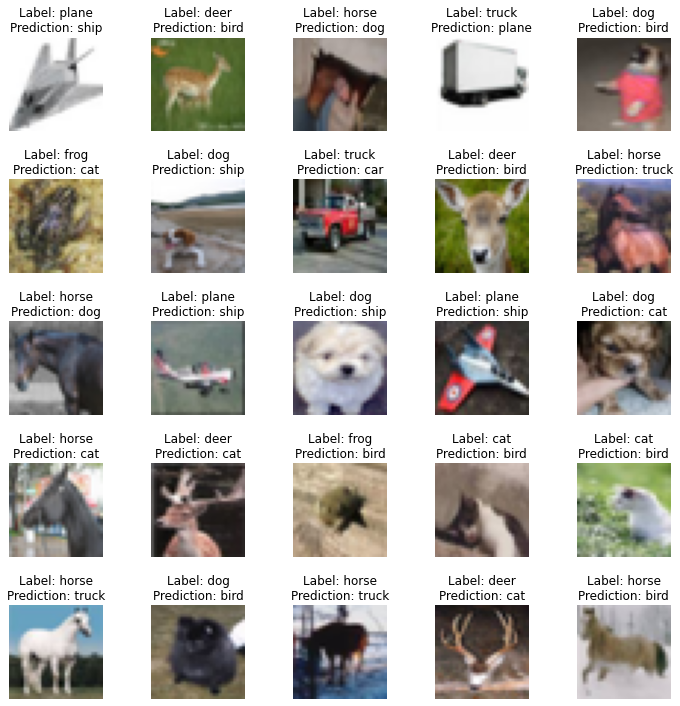

In [26]:
display.misclassifiedOnes(model, testLoader, incorrectSamples,'Misclassfied.png')